In [1]:
import cv2
import skimage.feature as feature
import numpy as np
import matplotlib.pyplot as plt
import imutils
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error as mse
from imutils.object_detection import non_max_suppression
import plotly.figure_factory as ff
import PIL #!pip install pillow
from PIL import Image

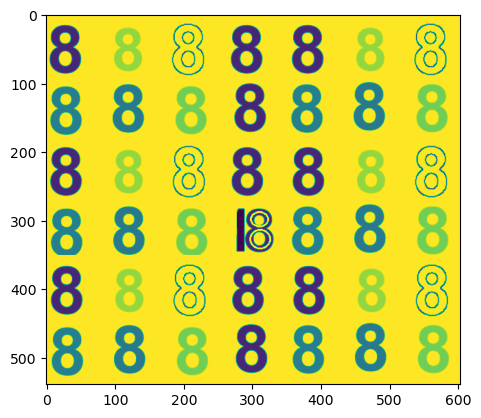

In [2]:
img = cv2.imread('numbers.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

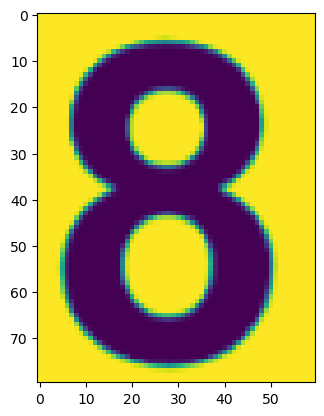

In [3]:
temp_img = gray[10:90,0:60]
plt.imshow(temp_img)

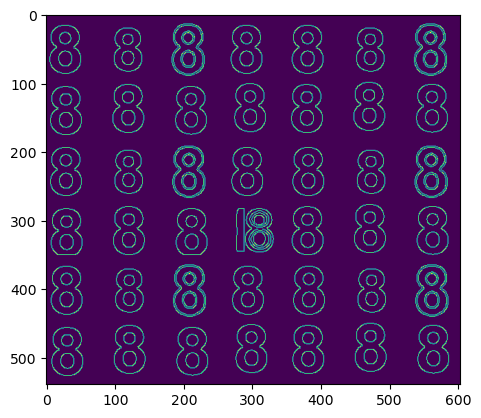

In [101]:
threshold1=20
threshold2=200
ed_img= cv2.Canny(gray,threshold1,threshold2)
plt.imshow(ed_img)


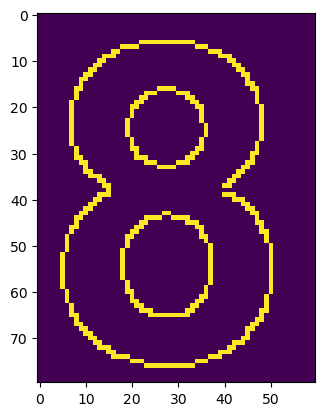

In [105]:
threshold1=20
threshold2=150
ed_temp = cv2.Canny(temp_img,threshold1,threshold2)
plt.imshow(ed_temp)

In [4]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [5]:
def sliding_window(image, stepsize, windowsize):
  for y in range(0, image.shape[0], stepsize):
    for x in range(0, image.shape[1], stepsize):
      yield(x, y, image[y:y + windowsize[1], x:x + windowsize[0]])


In [6]:
def compare_images(imageA, imageB):
  m = mse(imageA, imageB)
  return m

In [7]:
(winH,winW) = temp_img.shape

In [92]:
import time
lst=[]
source= img.copy()
for (x,y,window) in sliding_window(ed_img,stepsize=89,windowsize=(winW,winH)):
    if window.shape[0] != winH or window.shape[1] != winW:
        continue
    
    error = compare_images(ed_temp,window)
    lst.append((error,x,y))
    
    if error < 13000:
        cv2.rectangle(source, (x,y), (x+winW, y+winH), (0,255,0), 2)



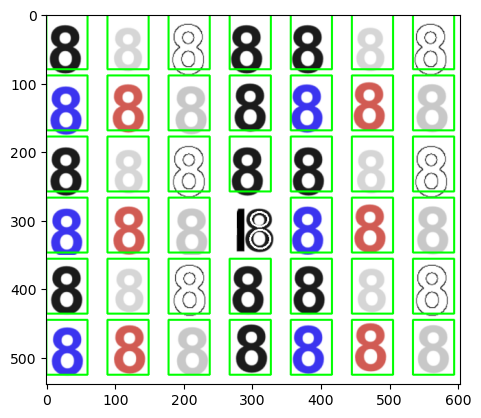

In [93]:
plt.imshow(source)

In [106]:
import time
lst=[]
source= img.copy()
for (x,y,window) in sliding_window(ed_img,stepsize=89,windowsize=(winW,winH)):
    if window.shape[0] != winH or window.shape[1] != winW:
        continue
    
    error = compare_images(ed_temp,window)
    lst.append((error,x,y))
    
    if error > 13000:
        cv2.rectangle(source, (x,y), (x+winW, y+winH), (0,255,0), 2)



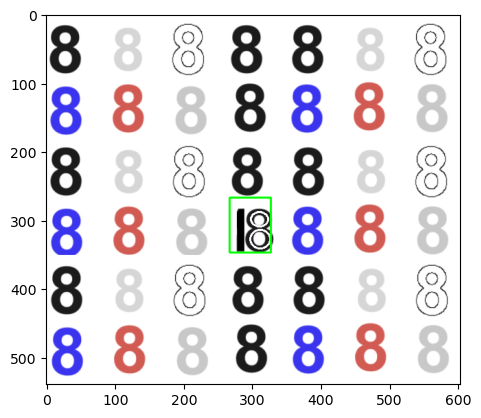

In [107]:
plt.imshow(source)